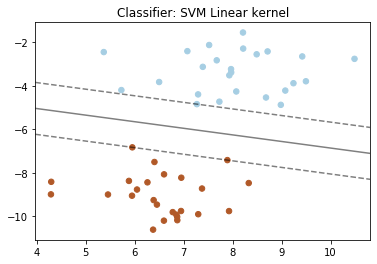

In [71]:
# 支持向量机 Support Vector Machine，SVM
# 如果样本数据是线性不可分的，之前的分类器处理这类数据效果不太好，但SVM却专治线性不可分数据。
# SVM可以将二维数据转变成三维数据，这称为将数据投射至高维空间。
# 这正是SVM算法的核函数（kernel trick）功能，用的最普遍的用于将数据投射到高维空间的方法是多项式内核（Polynomial kernel）和径向基内核（Radial Basis Function kernel，RBF）
# 多项式内核就是将不同的特征乘方处理。而RBF内核也称为高斯内核（Gaussian kernel），接下来介绍一下它。

# SVM算法中，训练模型的过程实际上是对每个数据点对于数据分类决定边界的重要性进行判断。
# 也就是说在训练数据集中，只有一部分数据对于边界的确定是有作用的，而这些数据点正好在决定边界上，这些数据被称为“支持向量”。

# 导入科学计算工具
import numpy as np
# 导入画图工具
import matplotlib.pyplot as plt
# 导入支持向量机
from sklearn import svm
# 导入数据集生成工具
from sklearn.datasets import make_blobs

# 创建50个数据点，让它分成两类
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# 创建一个线性内核的支持向量机模型
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
# 把数据点画出来
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# 建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 生成两个等差数列
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# 把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidths=1, facecolors='none')
plt.title('Classifier: SVM Linear kernel')
plt.show()

# 可以看到在分类器上下两边各有一条虚线，那些压在虚线上的数据点，就是支持向量。
# 本例中使用的方法称为”最大边界间隔超平面“（Maximum Margin Separating Hyperplane）
# 中间这条实线（在高维数据中，它是一个超平面）和所有支持向量之间的距离是最远的

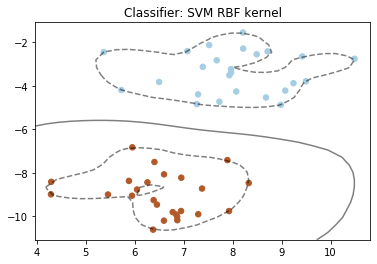

In [72]:
# 如果SVM支持向量机使用RBF内核
# 创建一个RBF内核的支持向量机模型
clf_rbf = svm.SVC(kernel='rbf', C=1000, gamma=0.5) # 要指定gamma
clf_rbf.fit(X, y)
# 画出数据点
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# 建立坐标系
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#生成两个等差数列
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T # 获取它的转置矩阵
Z = clf_rbf.decision_function(xy).reshape(XX.shape)

# 把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1], 
           s=100, linewidths=1, facecolors='none')
plt.title('Classifier: SVM RBF kernel')
plt.show()

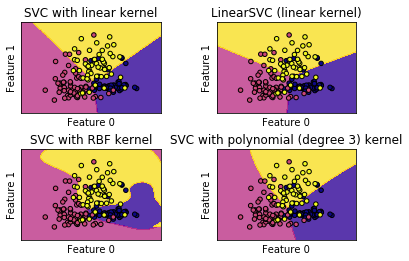

In [73]:
# 不同核函数对比
# 导入红酒数据集
from sklearn.datasets import load_wine
# 定义一个函数用于画图
def make_meshgrid(x, y, h= .02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() +1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# 定义一个绘制等高线的函数
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# 使用酒的数据集
wine = load_wine()
# 选取数据的前两个特征
X = wine.data[:, :2]
y = wine.target

C = 1.0 # SVM的正则化参数
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# 设定图片标题
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# 设定一个字图形的个数和排列方式
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
# 使用前面定义的函数作图
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.plasma, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.plasma, s=20, edgecolors='k')              
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
plt.show()

# 可以看到线性内核SVC和linearSVC的图像很相似，但还是有一些差异，因为linearSVC对L2范数进行最小化，二线性内核的SVC对L1范数进行最小化。
# 而RBF内核的SVC和多项式内核的SVC分类器的决定边界则完全不是线性的，他们更加灵活且富有弹性。而决定它们形状的就是他们的参数。
# 在多项式内核的SVC分类器中，起决定性作用的参数是乘方参数degree和正则化参数C；而在RBF内核的SVC分类器中，起决定性作用的参数是gamma和正则化参数C。

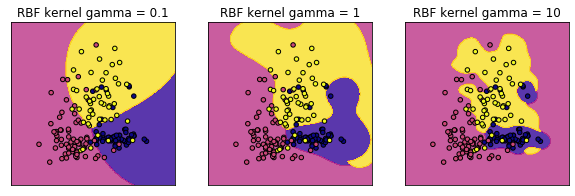

In [74]:
# 下面看下不同gamma值对于RBF内核的SVC分类器有什么影响。
C = 1.0  #SVM正则化参数
models = (svm.SVC(kernel='rbf', gamma=0.1, C=C),
          svm.SVC(kernel='rbf', gamma=1, C=C),
          svm.SVC(kernel='rbf', gamma=10, C=C),)
models = (clf.fit(X, y) for clf in models)

# 设定图像标题
titles = ('gamma = 0.1',
          'gamma = 1',
          'gamma = 10')

# 设置子图形的个数和排列
# 下面看下不同gamma值对于RBF内核的SVC分类器有什么影响。
C = 1.0  #SVM正则化参数
models = (svm.SVC(kernel='rbf', gamma=0.1, C=C),
          svm.SVC(kernel='rbf', gamma=1, C=C),
          svm.SVC(kernel='rbf', gamma=10, C=C),)
models = (clf.fit(X, y) for clf in models)

# 设定图像标题
titles = ('RBF kernel gamma = 0.1',
          'RBF kernel gamma = 1',
          'RBF kernel gamma = 10')

# 设置子图形的个数和排列
fig, sub = plt.subplots(1, 3, figsize = (10, 3))

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
# 使用定义好的函数画图
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.plasma, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.plasma, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_label('Feature 0')
    ax.set_label('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
plt.show()

# 可以看到gamma值越小，RBF内核的直径越大，更多的点被模型圈进决定边界中，所以决定边界也就越平滑，模型复杂度也会变小。
# 而随着gamma的增大，模型更倾向于把更多的点放到对应的决定边界中，模型复杂度也会上升。
# 所以gamma值越小，模型越倾向于欠拟合，反之gamma值越大，模型越倾向于过拟合。
# 至于正则化参数C，C越小，模型受到每个数据点的限制就越小，模型复杂度也越简单。

# SVM算法的优点：
# ①SVM可以在数据特征少/比较多的时候生成很复杂的决定边界（SVM在低纬和高纬表现都不错，前提是数据集不大，1万以内）。

# SVM算法的缺点：
# ①样本数量超过10万时，会非常耗费时间和内存；
# ②对于数据与处理和参数调节的要求非常高（内核类型kernel、内核宽度gamma、正则化参数C等等）。
# 而前面说的决策树和随机森林不需要预处理，也不需要煞费苦心调参。但SVM在处理图像识别领域、样本特征数和样本数比较接近时的情况下绰绰有余。

In [75]:
# SVM示例————波士顿房价回归分析
# 导入波士顿房价数据集
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())
print(boston['DESCR'])
# 总共有506个样本，每个样本有13个特征变量，还有一个名为中位值的target，以千美元为单位。

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [76]:
# 使用SVR（support vector machine regression）进行建模
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
# 建立训练集和测试集
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# 使用linear和rbf两种核函数建立回归模型
from sklearn.svm import SVR
# 分别测试linear和rbf核函数
for kernel in ['linear', 'rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    print(kernel,'kernel function train set score:{:.3f}'.format(svr.score(X_train, y_train)))
    print(kernel,'kernel function test set score:{:.3f}'.format(svr.score(X_test, y_test)))

# 可以看到两个模型得分都一般，特别是rbf内核的模型得分简直是灾难，这是因为我们没有对数据进行预处理，下面分析和处理一下数据。

X_train shape: (379, 13)
X_test shape: (127, 13)
linear kernel function train set score:0.709
linear kernel function test set score:0.696
rbf kernel function train set score:0.192
rbf kernel function test set score:0.222


<ipython-input-77-10814c9e1d34>:7: MatplotlibDeprecationWarning: Unrecognized location 'beast'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='beast')


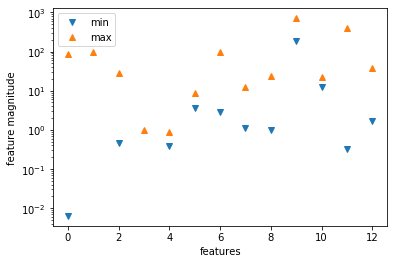

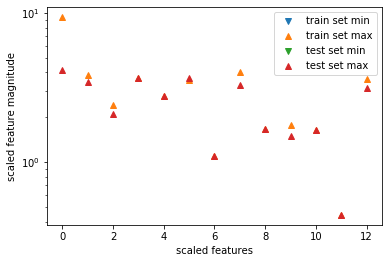

In [77]:
# 将特征数值中的最大值和最小值用散点画出来
plt.plot(X.min(axis=0), 'v', label='min')
plt.plot(X.max(axis=0), '^', label='max')
# 设定纵坐标为对数形式
plt.yscale('log')
# 设置图注位置为最佳
plt.legend(loc='beast')
# 设定横纵坐标标题
plt.xlabel('features')
plt.ylabel('feature magnitude')
plt.show()
# 可以看到特征数据最大差了4个数量级，下面对数据进行预处理

# %%
# 导入数据及预处理工具
from sklearn.preprocessing import StandardScaler
# 对测试集和训练集进行预处理
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 将预处理后的数据集表示出来
plt.plot(X_train_scaled.min(axis=0), 'v', label='train set min')
plt.plot(X_train_scaled.max(axis=0), '^', label='train set max')
plt.plot(X_test_scaled.min(axis=0), 'v', label='test set min')
plt.plot(X_test_scaled.max(axis=0), '^', label='test set max')
plt.yscale('log')
plt.legend(loc='best')

plt.xlabel('scaled features')
plt.ylabel('scaled feature magnitude')
plt.show()

# 可以看到特征值的最大值和最小值相差不超10，最小值更是小到趋近于零以至于没显示出来，下面使用经过预处理的数据训练模型

In [78]:
for kernel in ['linear', 'rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train_scaled, y_train)
    print(kernel,'kernel function scaled train set score:{:.3f}'.format(svr.score(X_train_scaled, y_train)))
    print(kernel,'kernel function scaled test set score:{:.3f}'.format(svr.score(X_test_scaled, y_test)))

# 可以看到样本数据经过预处理之后，虽然linear核函数训练的模型分数提升不高，但对于rbf和函数来说提升非常显著。

linear kernel function scaled train set score:0.706
linear kernel function scaled test set score:0.698
rbf kernel function scaled train set score:0.665
rbf kernel function scaled test set score:0.695


In [79]:
# 进一步调整SVR的参数gamma和C，看分数可以提升多少
for kernel in ['linear', 'rbf']:
    svr = SVR(kernel=kernel, C=100,  gamma=0.1)
    svr.fit(X_train_scaled, y_train)
    print(kernel,'kernel function scaled train set after adjust params score:{:.3f}'.format(svr.score(X_train_scaled, y_train)))
    print(kernel,'kernel function scaled test set after adjust params score:{:.3f}'.format(svr.score(X_test_scaled, y_test)))

# 对于RBF核函数来说分数不错
# 综上所述可以看出SVM算法对于数据的预处理和调参的要求很高。

linear kernel function scaled train set after adjust params score:0.706
linear kernel function scaled test set after adjust params score:0.699
rbf kernel function scaled train set after adjust params score:0.966
rbf kernel function scaled test set after adjust params score:0.894
